In [1]:
from statspace.model import StructuralTimeSeriesConfig, StructuralTimeSeriesBuilder
import numpy as np
import pandas as pd

In [21]:
config = StructuralTimeSeriesConfig(trend_order=2, trend_innovations_order=0)
model_builder = StructuralTimeSeriesBuilder(config.to_dict())

                             Model Requirements                             
                                                                            
  Variable        Shape    Constraints                          Dimensions  
 ────────────────────────────────────────────────────────────────────────── 
  initial_trend   (2,)                                    ('trend_state',)  
  P0              (2, 2)   Positive semi-definite   ('state', 'state_aux')  
                                                                            
These parameters should be assigned priors inside a PyMC model block before 
                 calling the build_statespace_graph method.                 

In [22]:
model_builder.build_model(X=None, y=pd.Series(np.random.normal(size=10), index=pd.date_range(start="1993-05-15", freq='YE', periods=10)))

Building model with parameters: ['initial_trend', 'P0']
Parameter dimensions: {'initial_trend': ('trend_state',), 'P0': ('state', 'state_aux')}


In [23]:
config.to_dict()

{'trend': {'order': 2, 'innovations_order': 0}, 'ar': {'order': 1}}

In [34]:
y = pd.Series(np.arange(100) + np.random.normal(size=100, scale=1), index=pd.date_range(start="1992-03-01", freq="YE", periods=100))
model_builder.fit(y=pd.Series(y))

Building model with parameters: ['initial_trend', 'P0']
Parameter dimensions: {'initial_trend': ('trend_state',), 'P0': ('state', 'state_aux')}


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [initial_trend]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 251 seconds.
Sampling: [initial_trend, obs]
Sampling: [obs]


Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> prior
	> prior_predictive
	> observed_data
	> constant_data
	> fit_data

In [7]:
import arviz as az

array([<Axes: title={'center': 'initial_trend\nlevel'}>,
       <Axes: title={'center': 'initial_trend\ntrend'}>], dtype=object)

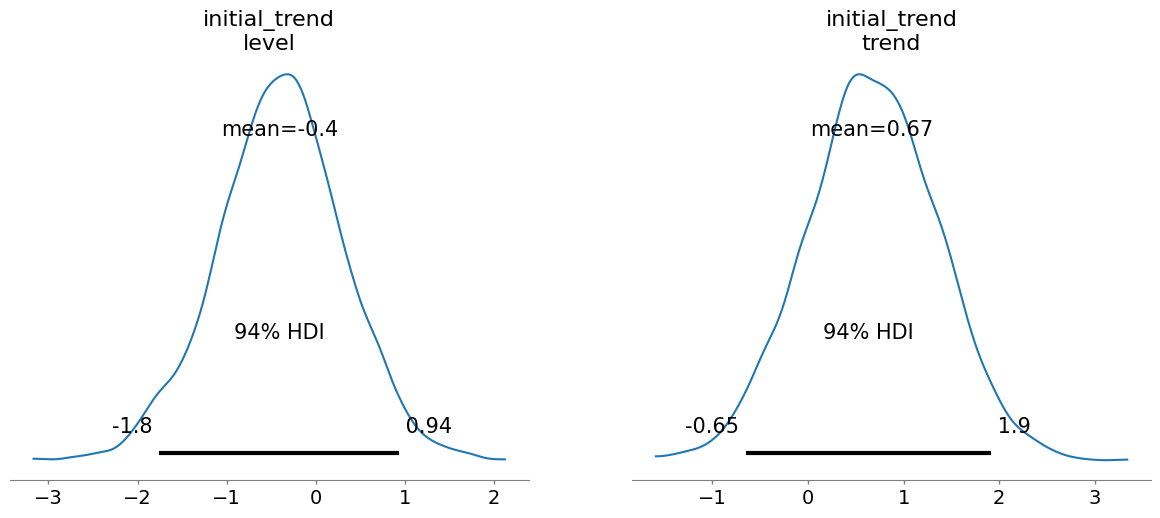

In [40]:
az.plot_posterior(model_builder.idata,var_names=["initial_trend"] )